In [ ]:
# Replace with your file path

file_path = 'drive/MyDrive/Econ_0150_Project/'

# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')
drive.mount("/content/drive", force_remount=True)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn   as sns
import sys


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Mounted at /content/drive


# Research Question

*Is minimum wage related to voter turnout by state?*

### Load Elections Data

*Data collected from electionlab.mit.edu*.

In [ ]:
elections = pd.read_csv(file_path + 'cleaned_election_turnout.csv')

# Set FIPS as index
# elections = elections.dropna()
# elections.index = elections.county_fips.astype(int).astype(str)

# Print header
elections.head()

,Year,State,Minimum_Wage,Voter_Turnout,Median_Household_Income
0,NaN,NaN,NaN,NaN,NaN
1,1984.0,Alabama,0.00,60.8,"$17,310"
2,1984.0,Alaska,3.85,59.1,"$32,356"
3,1984.0,Arizona,0.00,54.0,"$21,425"
4,1984.0,Arkansas,2.70,60.3,"$15,674"


In [ ]:
# --- Install dependencies (Colab usually has these already) ---
!pip install pandas statsmodels

# --- Import packages ---
import pandas as pd
import statsmodels.api as sm

# Use the file_path defined earlier to ensure consistency
df = pd.read_csv(file_path + 'cleaned_election_turnout.csv')

# Clean column names by stripping leading/trailing whitespace
df.columns = df.columns.str.strip()

# Clean 'Median_Household_Income' column: remove '$', ',' and convert to numeric
df['Median_Household_Income'] = df['Median_Household_Income'].astype(str).str.replace('$', '', regex=False).str.replace(',', '', regex=False)
df['Median_Household_Income'] = pd.to_numeric(df['Median_Household_Income'], errors='coerce')

# --- Basic cleaning ---
df = df.dropna(subset=['Minimum_Wage', 'Voter_Turnout', 'Median_Household_Income'])

# --- Define variables ---
X = df[['Minimum_Wage', 'Median_Household_Income']]
X = sm.add_constant(X)   # adds β0 (intercept)
y = df['Voter_Turnout']

# --- Build linear model ---
model = sm.OLS(y, X).fit()

# --- Print summary ---
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:          Voter_Turnout   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     1.818
Date:                Mon, 08 Dec 2025   Prob (F-statistic):              0.164
Time:                        03:08:17   Log-Likelihood:                -1505.8
No. Observations:                 459   AIC:                             3018.
Df Residuals:                     456   BIC:                             3030.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

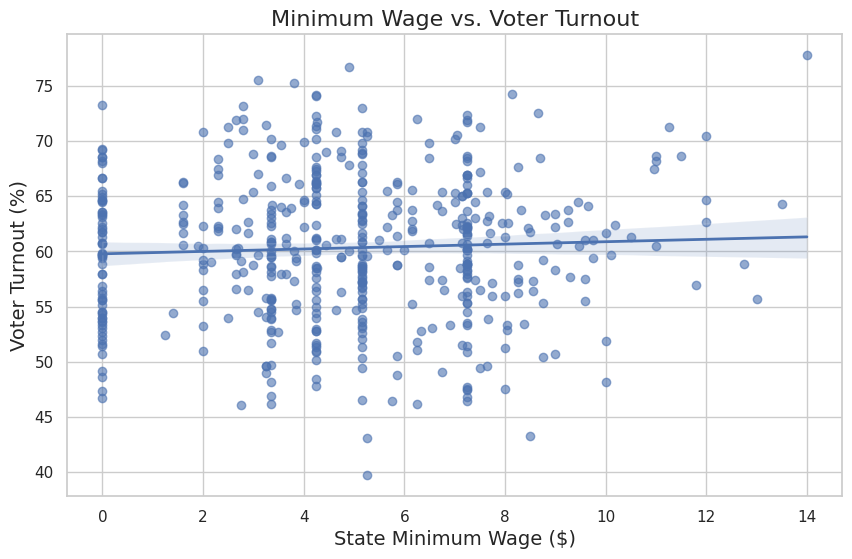

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Load your data (if not already loaded)
df = pd.read_csv('cleaned_election_turnout.csv')

# Drop missing values
df = df.dropna(subset=['Minimum_Wage', 'Voter_Turnout'])

# Set style
sns.set(style="whitegrid")

# Create scatterplot with regression line
plt.figure(figsize=(10, 6))
sns.regplot(
    x='Minimum_Wage',
    y='Voter_Turnout',
    data=df,
    scatter_kws={'alpha': 0.6},
    line_kws={'linewidth': 2}
)

plt.title("Minimum Wage vs. Voter Turnout", fontsize=16)
plt.xlabel("State Minimum Wage ($)", fontsize=14)
plt.ylabel("Voter Turnout (%)", fontsize=14)

plt.show()


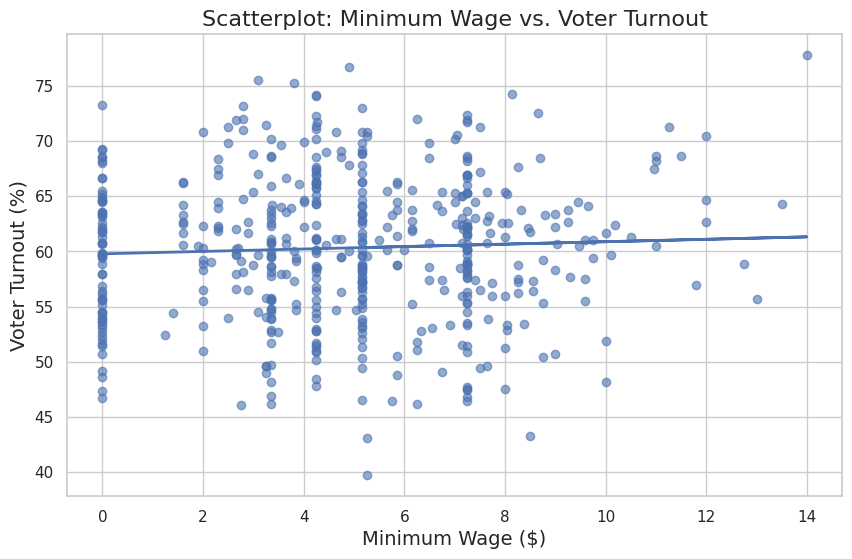

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the CSV (Colab puts uploaded files in the working directory)
df = pd.read_csv("cleaned_election_turnout.csv")

# Drop missing values
df = df.dropna(subset=["Minimum_Wage", "Voter_Turnout"])

# Create scatterplot
plt.figure(figsize=(10, 6))
plt.scatter(df["Minimum_Wage"], df["Voter_Turnout"], alpha=0.6)

# Compute regression line
m, b = np.polyfit(df["Minimum_Wage"], df["Voter_Turnout"], 1)
plt.plot(df["Minimum_Wage"], m * df["Minimum_Wage"] + b, linewidth=2)

# Labels and title
plt.xlabel("Minimum Wage ($)", fontsize=14)
plt.ylabel("Voter Turnout (%)", fontsize=14)
plt.title("Scatterplot: Minimum Wage vs. Voter Turnout", fontsize=16)

plt.show()


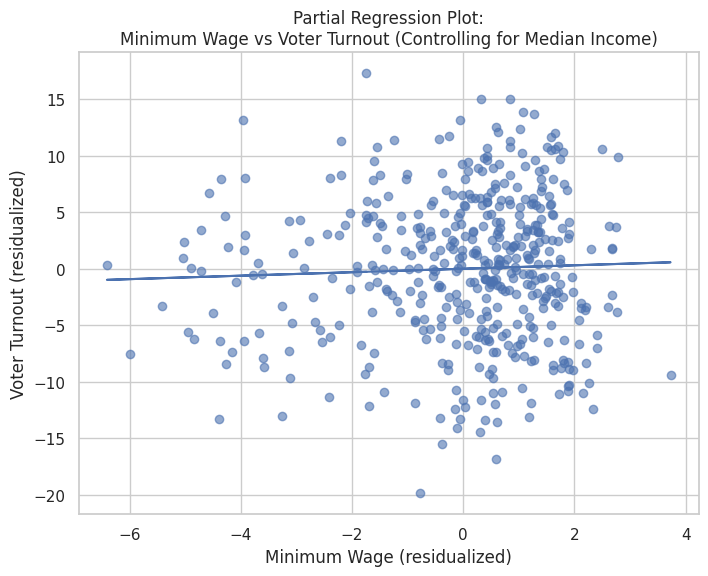

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Load your dataset
df = pd.read_csv(file_path + "cleaned_election_turnout.csv")

# Clean column names by stripping leading/trailing whitespace
df.columns = df.columns.str.strip()

# Clean 'Median_Household_Income' column: remove '$', ',' and convert to numeric
df['Median_Household_Income'] = df['Median_Household_Income'].astype(str).str.replace('$', '', regex=False).str.replace(',', '', regex=False)
df['Median_Household_Income'] = pd.to_numeric(df['Median_Household_Income'], errors='coerce')

# Clean missing values
df = df.dropna(subset=["Minimum_Wage", "Voter_Turnout", "Median_Household_Income"])

# ----------------------------
# Step 1: Regress Turnout on Median Income
# ----------------------------
X_income = sm.add_constant(df["Median_Household_Income"])
model_income = sm.OLS(df["Voter_Turnout"], X_income).fit()

# residual turnout = turnout after removing income effect
df["Turnout_resid"] = model_income.resid

# ----------------------------
# Step 2: Regress Minimum Wage on Median Income
# ----------------------------
model_income2 = sm.OLS(df["Minimum_Wage"], X_income).fit()

# residual min wage = min wage after removing income effect
df["MW_resid"] = model_income2.resid

# ----------------------------
# Step 3: Scatterplot of residuals (partial regression)
# ----------------------------
plt.figure(figsize=(8,6))
plt.scatter(df["MW_resid"], df["Turnout_resid"], alpha=0.6)

# regression line on the residuals
m, b = np.polyfit(df["MW_resid"], df["Turnout_resid"], 1)
plt.plot(df["MW_resid"], m*df["MW_resid"] + b)

plt.title("Partial Regression Plot:\nMinimum Wage vs Voter Turnout (Controlling for Median Income)")
plt.xlabel("Minimum Wage (residualized)")
plt.ylabel("Voter Turnout (residualized)")

plt.show()

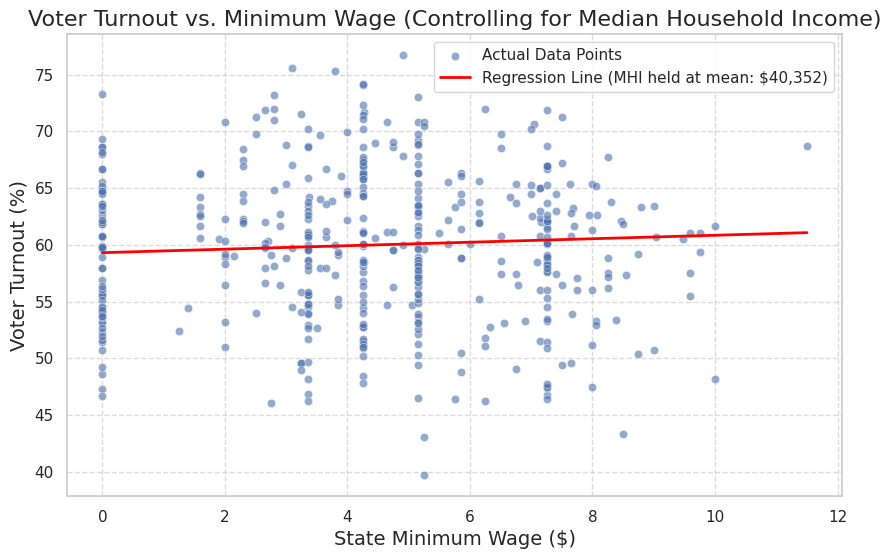

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import statsmodels.api as sm
import numpy as np

# Load the data and perform cleaning (as in previous steps)
df = pd.read_csv(file_path + 'cleaned_election_turnout.csv')
df.columns = df.columns.str.strip()
df['Median_Household_Income'] = df['Median_Household_Income'].astype(str).str.replace('$', '', regex=False).str.replace(',', '', regex=False)
df['Median_Household_Income'] = pd.to_numeric(df['Median_Household_Income'], errors='coerce')
df = df.dropna(subset=['Minimum_Wage', 'Voter_Turnout', 'Median_Household_Income'])

# Run the multiple regression model (as done in PDde46Qm6PfW or d303f6e2)
X_multi = df[['Minimum_Wage', 'Median_Household_Income']]
X_multi = sm.add_constant(X_multi)
y_multi = df['Voter_Turnout']
model_multi = sm.OLS(y_multi, X_multi).fit()

# Get coefficients from the multiple regression model
const_coeff = model_multi.params['const']
mw_coeff = model_multi.params['Minimum_Wage']
mhi_coeff = model_multi.params['Median_Household_Income']

# Calculate the mean of Median_Household_Income to hold it constant
mean_mhi = df['Median_Household_Income'].mean()

# Create a range of Minimum_Wage values for the regression line
mw_values = np.linspace(df['Minimum_Wage'].min(), df['Minimum_Wage'].max(), 100)

# Construct the exog DataFrame for prediction, ensuring columns and order match X_multi
mw_range_for_predict = pd.DataFrame({
    'const': 1.0,  # Explicitly add the constant
    'Minimum_Wage': mw_values,
    'Median_Household_Income': mean_mhi
})

# Predict Voter_Turnout for the regression line
predicted_turnout = model_multi.predict(mw_range_for_predict)

# Create the scatterplot with the controlled regression line
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Minimum_Wage', y='Voter_Turnout', data=df, alpha=0.6, label='Actual Data Points')
plt.plot(mw_range_for_predict['Minimum_Wage'], predicted_turnout, color='red', linewidth=2, label=f'Regression Line (MHI held at mean: ${mean_mhi:,.0f})')

plt.title("Voter Turnout vs. Minimum Wage (Controlling for Median Household Income)", fontsize=16)
plt.xlabel("State Minimum Wage ($)", fontsize=14)
plt.ylabel("Voter Turnout (%)", fontsize=14)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

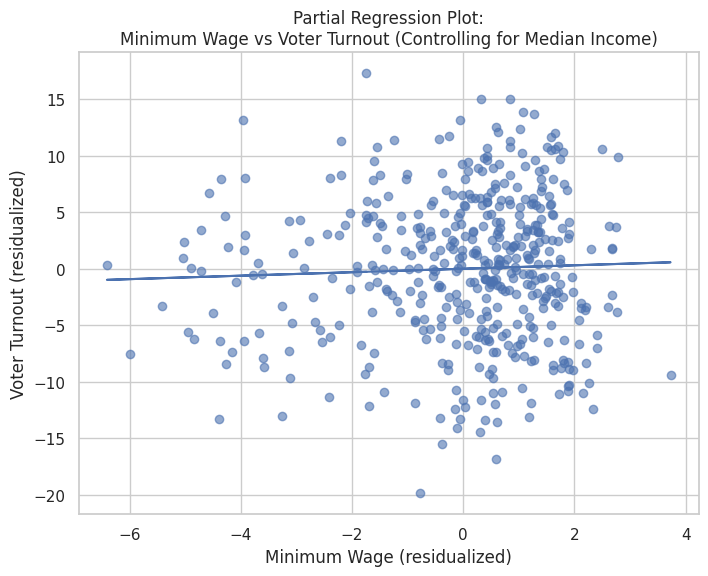

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Load your dataset
df = pd.read_csv(file_path + "cleaned_election_turnout.csv")

# Clean column names by stripping leading/trailing whitespace
df.columns = df.columns.str.strip()

# Clean 'Median_Household_Income' column: remove '$', ',' and convert to numeric
df['Median_Household_Income'] = df['Median_Household_Income'].astype(str).str.replace('$', '', regex=False).str.replace(',', '', regex=False)
df['Median_Household_Income'] = pd.to_numeric(df['Median_Household_Income'], errors='coerce')

# Clean missing values
df = df.dropna(subset=["Minimum_Wage", "Voter_Turnout", "Median_Household_Income"])

# ----------------------------
# Step 1: Regress Turnout on Median Income
# ----------------------------
X_income = sm.add_constant(df["Median_Household_Income"])
model_income = sm.OLS(df["Voter_Turnout"], X_income).fit()

# residual turnout = turnout after removing income effect
df["Turnout_resid"] = model_income.resid

# ----------------------------
# Step 2: Regress Minimum Wage on Median Income
# ----------------------------
model_income2 = sm.OLS(df["Minimum_Wage"], X_income).fit()

# residual min wage = min wage after removing income effect
df["MW_resid"] = model_income2.resid

# ----------------------------
# Step 3: Scatterplot of residuals (partial regression)
# ----------------------------
plt.figure(figsize=(8,6))
plt.scatter(df["MW_resid"], df["Turnout_resid"], alpha=0.6)

# regression line on the residuals
m, b = np.polyfit(df["MW_resid"], df["Turnout_resid"], 1)
plt.plot(df["MW_resid"], m*df["MW_resid"] + b)

plt.title("Partial Regression Plot:\nMinimum Wage vs Voter Turnout (Controlling for Median Income)")
plt.xlabel("Minimum Wage (residualized)")
plt.ylabel("Voter Turnout (residualized)")

plt.show()

In [ ]:
# Load the data again (or ensure df is in the correct state)
df = pd.read_csv(file_path + 'cleaned_election_turnout.csv')
df.columns = df.columns.str.strip()
df['Median_Household_Income'] = df['Median_Household_Income'].astype(str).str.replace('$', '', regex=False).str.replace(',', '', regex=False)
df['Median_Household_Income'] = pd.to_numeric(df['Median_Household_Income'], errors='coerce')
df = df.dropna(subset=['Minimum_Wage', 'Voter_Turnout', 'Median_Household_Income'])

# Simple Regression: Voter_Turnout ~ Minimum_Wage
X_simple = sm.add_constant(df['Minimum_Wage'])
y_simple = df['Voter_Turnout']

model_simple = sm.OLS(y_simple, X_simple).fit()

print("\\n--- Simple Regression Results (Voter_Turnout ~ Minimum_Wage) ---")
print(model_simple.summary())

print("\\n--- Multiple Regression Results (Voter_Turnout ~ Minimum_Wage + Median_Household_Income) ---")
# These are the results from cell PDde46Qm6PfW
X_multi = df[['Minimum_Wage', 'Median_Household_Income']]
X_multi = sm.add_constant(X_multi)
y_multi = df['Voter_Turnout']
model_multi = sm.OLS(y_multi, X_multi).fit()
print(model_multi.summary())


\n--- Simple Regression Results (Voter_Turnout ~ Minimum_Wage) ---
                            OLS Regression Results                            
Dep. Variable:          Voter_Turnout   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.4179
Date:                Mon, 08 Dec 2025   Prob (F-statistic):              0.518
Time:                        04:39:43   Log-Likelihood:                -1507.4
No. Observations:                 459   AIC:                             3019.
Df Residuals:                     457   BIC:                             3027.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------